# importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Importing the dataset from Kaggle Library

In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data")


Skipping, found downloaded files in ".\new-york-city-airbnb-open-data" (use force=True to force download)


In [4]:
# reading the XLSX file
data_dir = './new-york-city-airbnb-open-data'

# displaying the contents of the XLSX file
files = os.listdir(data_dir)

# Display the list of files
print("Files in the dataset directory:")
for file in files:
    print(file)


Files in the dataset directory:
AB_NYC_2019.csv
New_York_City_.png


In [5]:
# Loading the Airbnb Dataset

df = pd.read_csv(data_dir + '/AB_NYC_2019.csv')

In [6]:
# Dataset First Look

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Dataset Rows & Columns count

df.shape


(48895, 16)


we can see that dataset has 48895  rows and 16 columns

In [8]:
# Dataset Columns

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Understanding the Task

The tasks for visualization are written in bullet points:

1. Price Distribution Across Neighborhoods: Compare prices in different areas.
2. Room Type Distribution: Analyze the variety of accommodation types.
3. Geospatial Analysis: Map the locations of listings.
4. Average Price by Neighborhood Group: Compare prices by broader neighborhood categories.

In [9]:
# Dataset Duplicate Value Count
df[df.duplicated()].sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                          0.0
longitude                         0.0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                 0.0
calculated_host_listings_count      0
availability_365                    0
dtype: object

In [10]:
## There are no duplicate data in the dataset, we can proceed for Missing Values

In [11]:
# Check for missing values
missing_values = df.isna().sum()

# Display the number of missing values in each column
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [12]:
# Dataset Describe

df.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


In [13]:
# The above table summarizes the descriptive statistics for each numerical attribute in the dataset, including count, mean, standard deviation,
# minimum, quartiles, and maximum values.

In [14]:
# Checking Unique Values for each variable.

df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Data Wrangling

In [15]:
# Dropping id, host_name, last_review columns as they are unnecessary and will not impact our analysis and dataset

df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [16]:
df.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Null Values Handling

In [17]:

# Drop rows with missing values in the 'name' column
df.dropna(subset=['name'], inplace=True)

# Fill missing values in the 'reviews_per_month' column with the mean of that column
mean_reviews_per_month = df['reviews_per_month'].mean()
df.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = mean_reviews_per_month

In [18]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
print(df.dtypes)


name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [20]:
# Dataset Describe

df.describe().round()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0
mean,67630125.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,78620698.0,0.0,0.0,240.0,20.0,45.0,1.0,33.0,132.0
min,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,7816856.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,30791331.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


# outlier detection for price and removing it

<Axes: xlabel='price'>

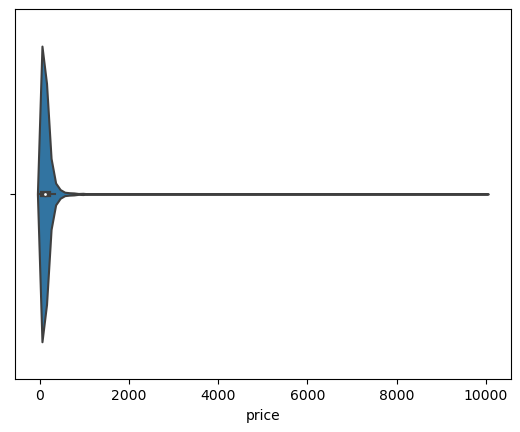

In [21]:
import matplotlib.pyplot as plt 

sns.violinplot(data = df, x = df['price'])

In [22]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.373410,7.145891,112.788989
std,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.497958,32.957738,131.613322
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [23]:
percentile_05 = df['price'].quantile(.25)
percentile_95 = df['price'].quantile(.75)

df_clean = df[(percentile_05 <= df['price']) & (df['price'] <= percentile_95)]

<Axes: xlabel='price'>

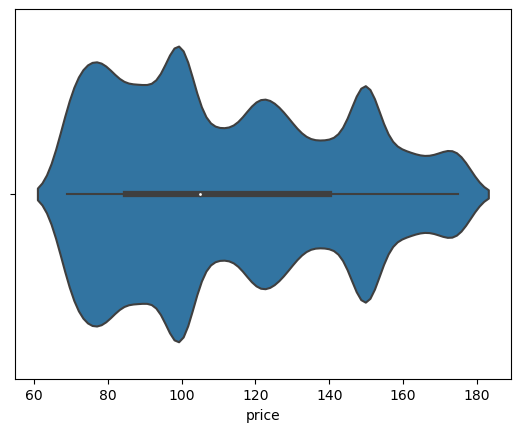

In [24]:
sns.violinplot(data = df_clean, x = df_clean['price'])

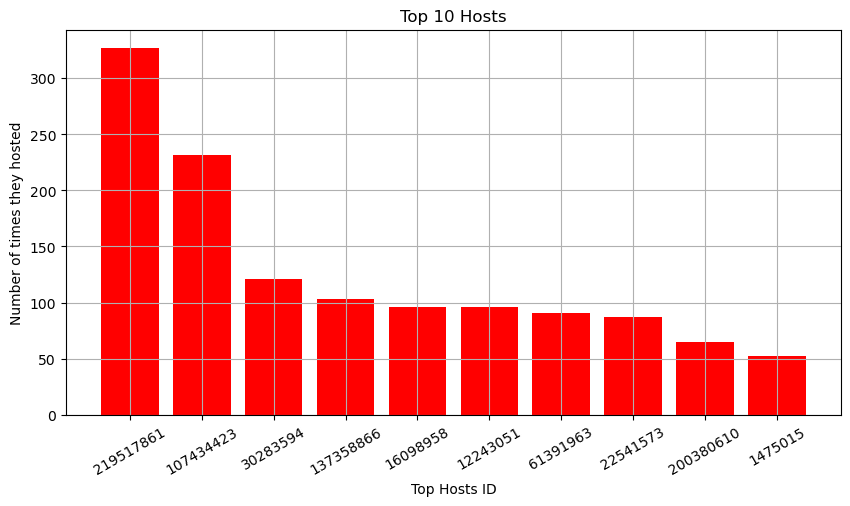

In [25]:
# Visualising who are the top 10 hosts

top_hosts = df['host_id'].value_counts().head(10)
top_hosts_id = list(map(lambda x : str(x) , top_hosts.keys()))
top_hosts_count = list(top_hosts)

plt.figure(figsize=(10, 5))
plt.bar(top_hosts_id, top_hosts_count, color = 'r')
plt.grid(True)
plt.title('Top 10 Hosts')
plt.xticks(rotation = 30)
plt.xlabel('Top Hosts ID')
plt.ylabel('Number of times they hosted')
plt.show()

The chart highlights that host '219517861' stands out as the top host, having hosted properties the most number of times compared to other hosts. This visualization presents the top 10 hosts based on the frequency of hosting occurrences.

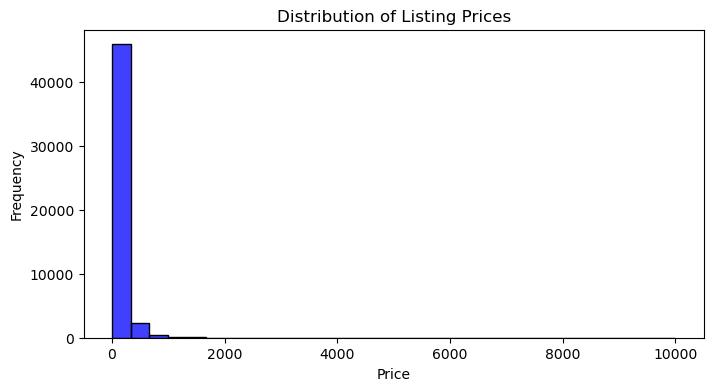

In [26]:
# Visualizing Distribution of Listing Prices
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, color='b')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the $0 to $350 price range has the highest frequency, exceeding 40,000 listings. This insight helps Airbnb set competitive pricing, identify popular price ranges, and optimize pricing strategies for hosts.

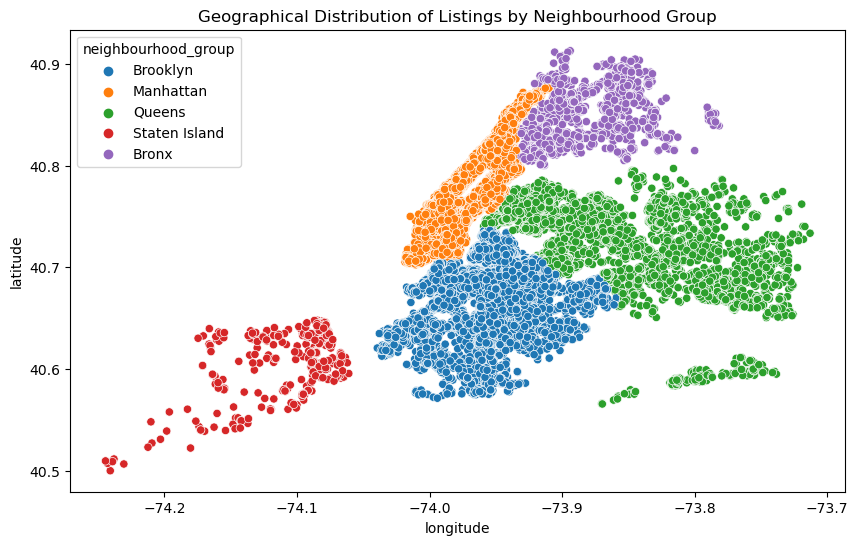

In [27]:
# Visualization of Geographical Distribution of listings.

plt.figure(figsize= (10,6))
plt.title('Geographical Distribution of Listings by Neighbourhood Group')

sns.scatterplot(x = df.longitude, y = df.latitude,hue=df.neighbourhood_group)
plt.show()

The scatter plot illustrates the geographical distribution of listings, with colors indicating different neighborhood groups. Dense market areas are evident in Manhattan and Brooklyn, while Queens has fewer listings spread across a wider area. This visualization guides business decisions, helping target audiences more effectively and optimize services based on regional preferences.

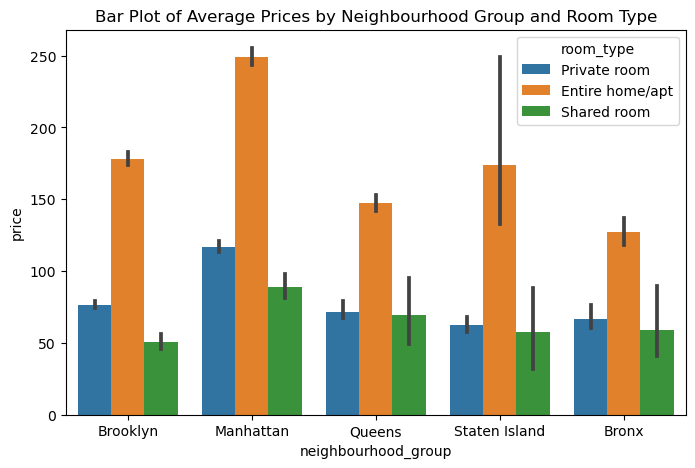

In [28]:
plt.figure(figsize=(8,5))
plt.title('Bar Plot of Average Prices by Neighbourhood Group and Room Type')
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.show()

The bar plot illustrates average prices for different room types across neighborhood groups. Manhattan stands out with higher prices for all room types compared to other areas. Prices in Queens, Staten Island, and Bronx are relatively similar. This insight guides pricing strategies, allowing Airbnb to tailor promotions and marketing efforts based on observed patterns.

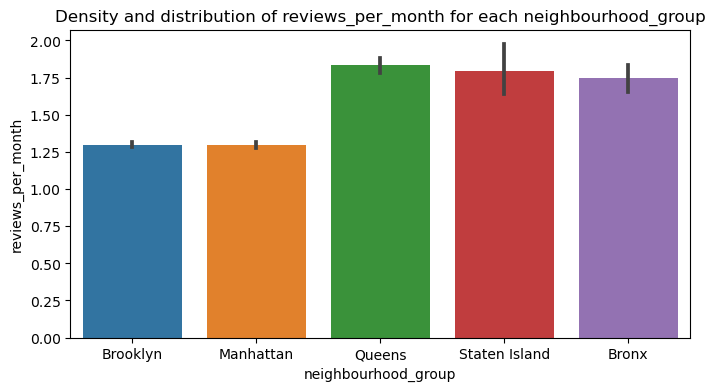

In [29]:
# Visualising distribution of reviews_per_month for each neighberhood_group

plt.figure(figsize = (8,4))
plt.title('Density and distribution of reviews_per_month for each neighbourhood_group')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df)
plt.show()

The chart displays the average reviews_per_month for each neighborhood group. Queens shows the highest review activity, while Brooklyn and Manhattan have similar levels. This insight aids in understanding customer engagement and satisfaction, guiding business decisions. Identifying areas with varying review activity helps Airbnb prioritize improvements and optimize customer experiences.

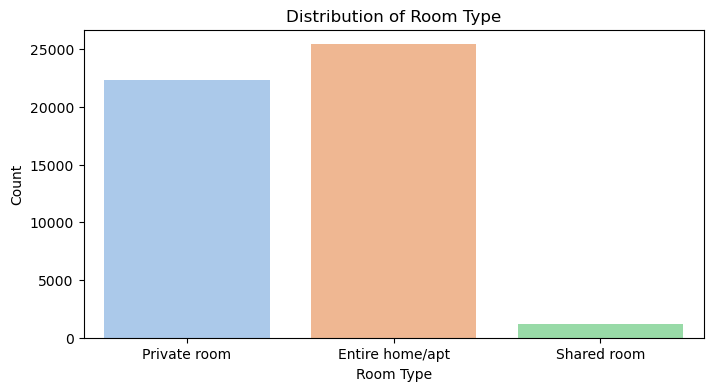

In [30]:
# Distribution of room_type

plt.figure(figsize=(8, 4))
sns.countplot(x = 'room_type', data= df, palette='pastel')
plt.title('Distribution of Room Type')

# Customizing the plot
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The chart reveals the distribution of different room types in the dataset.
Each bar represents a specific room type, and the height of the bar indicates the count (frequency) of the room type.

Here we can see that 'Entire home/apt' Room type has higher number of frequency and 'Shared room' has lower frequency.

This visualization can help Airbnb tailor marketing strategies, improve user experience, and optimize resource allocation.

understanding distribution allows the platform to highlight and promote the most popular room types.

# Feature correlaction

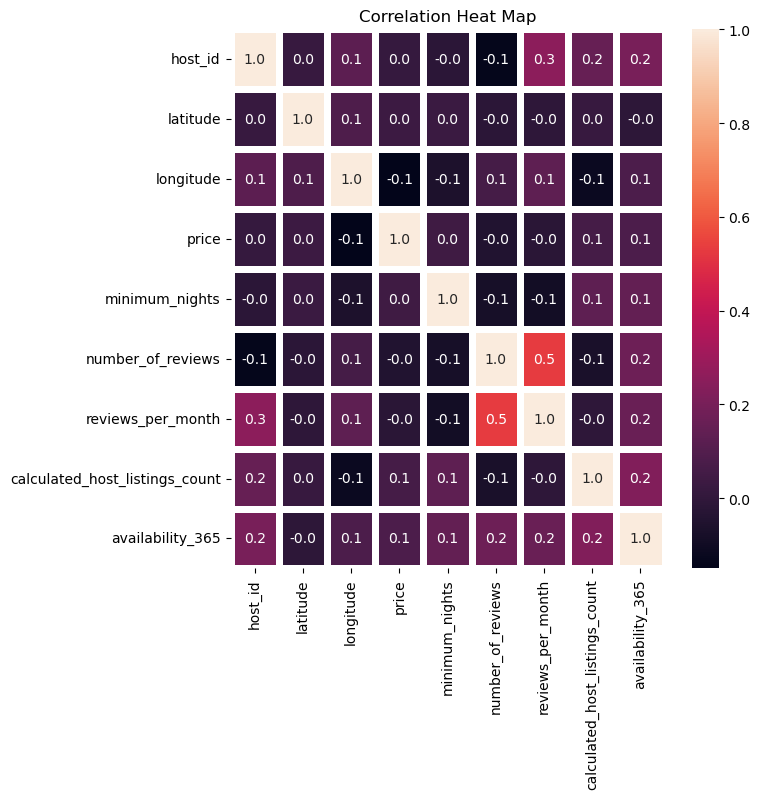

In [31]:
# Correlation Heatmap visualization 

# Selecting only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualization of Correlation Heat Map
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation Heat Map')

# Use only numeric columns for correlation matrix
sns.heatmap(df[numeric_columns].corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)

plt.show()

# Dimensionality reduction using PCA and TSNE

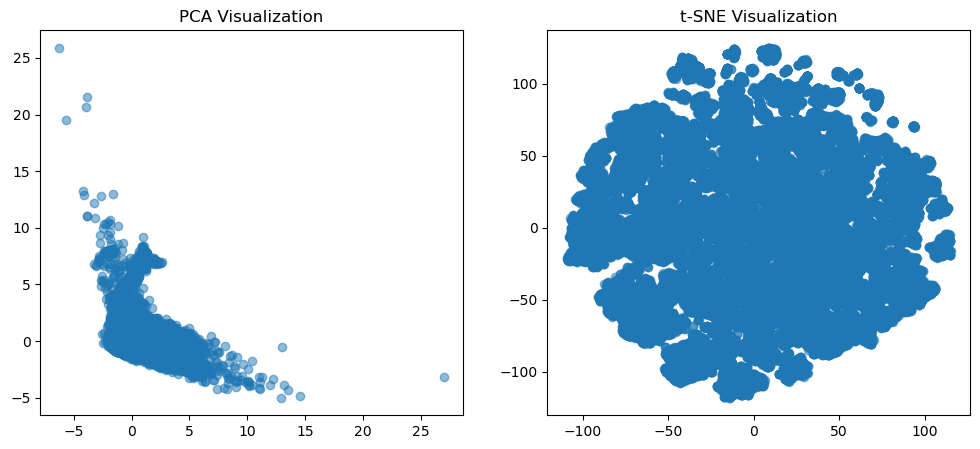

In [32]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Select numerical features for dimensionality reduction
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_features_standardized)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numerical_features_standardized)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot PCA result
axs[0].scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
axs[0].set_title('PCA Visualization')

# Plot t-SNE result
axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
axs[1].set_title('t-SNE Visualization')

plt.show()